# 第2回　ロジスティック回帰
3月17日　石村

## データセット
irisデータ

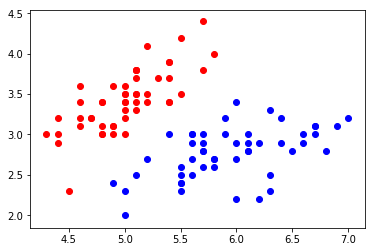

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
target = iris.target
y = target[target!=2]
# 2つだけ
X = iris.data[target != 2][:, :2]

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')

# scikit-learnのロジスティック回帰

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=9)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
lr.coef_

array([[ 3.0786959, -3.0220097]])

In [64]:
lr.intercept_

array([-7.30634549])

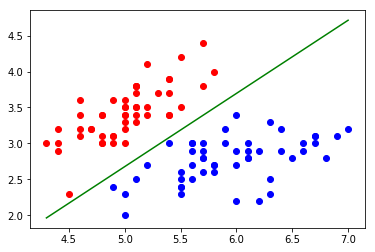

In [65]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = -1 * lr.coef_[0][0] / lr.coef_[0][1] * x_min - lr.intercept_ / lr.coef_[0][1]
y_max = -1 * lr.coef_[0][0] / lr.coef_[0][1] * x_max - lr.intercept_ / lr.coef_[0][1]

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')
plt.plot([x_min, x_max], [y_min, y_max], color='green')

In [66]:
lr.score(X, y)

1.0

# 自力で実装

In [124]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def calc_loss(y_true, y_pred):
    eps = 1e-15
    loss = -(-y_true * np.log(y_pred-eps) + (1-y_true) * np.log(1-y_pred+eps)).mean()
    return loss

def update_params(w, X, proba, y, lr):
    gradient = (X.T @ (proba - y))
    w = w - lr / len(X) * gradient
    return w


class MyLogisticRegression():
    def __init__(self, fit_intercept=True):
        self.w = None
        self.X = None
        self.y_true = None
        self.fit_intercept=fit_intercept
        return
    
    def initialize_params(self, size):
        # np.random.seed(seed=32)
        return np.random.rand(size)
    
    def add_const(self, X):
        return np.hstack((X, np.ones((len(X), 1))))
    
    def fit(self, X, y):
        if self.fit_intercept:
            self.X = self.add_const(X)
        self.y_true = y
        self.w = self.initialize_params(self.X.shape[1])
        
        lr = 0.01
        max_itr = 10000
        loss_hist = float('inf')
        for i in range(max_itr):
            y_proba = self.predict_proba(self.X)
            log_loss = calc_loss(self.y_true, y_proba)
            if log_loss > loss_hist:
                print(i)
                break
            loss_hist = min(loss_hist, log_loss)
            self.w = update_params(self.w, self.X, y_proba, self.y_true, lr)
        
    def predict_proba(self, X):
        if self.fit_intercept:
            return sigmoid(self.X @ self.w)
        else:
            return sigmoid(X @ self.w)
    
    def score(self, X, y):
        y_pred = (self.predict_proba(X) > 0.5) * 1
        return (y_pred == y).sum() / len(y)

In [119]:
mlr = MyLogisticRegression()

In [120]:
mlr.fit(X, y)

In [121]:
mlr.score(X, y)

0.99

In [122]:
mlr.w

array([ 3.0414894 , -5.09739709, -0.69327281])

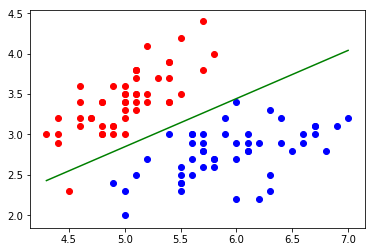

In [123]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = -1 * mlr.w[0] / mlr.w[1] * x_min - mlr.w[2] / mlr.w[1]
y_max = -1 * mlr.w[0] / mlr.w[1] * x_max - mlr.w[2] / mlr.w[1]

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')
plt.plot([x_min, x_max], [y_min, y_max], color='green')